<a href="https://colab.research.google.com/github/Ifra96/820-BDP/blob/main/BDP_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas==1.3.1

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import pandas as pd
import numpy as np
import re
import pandas as pd
#needed for text processing and analytics
import nltk
import nltk.stem

from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk import pos_tag, sent_tokenize, word_tokenize, BigramAssocMeasures,\
    BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
from nltk.corpus import stopwords
from string import punctuation

#visualization
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


#to plot inside the document
%matplotlib inline
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

Upload Speech as .txt file and any image you want the word cloud to be,

In [ ]:
from google.colab import files #import statements of leaders at txt files
uploaded = files.upload()

Saving Modhi-address-.txt to Modhi-address-.txt


In [ ]:
f = open("Modhi-address-.txt", "r") #read
print(f.read())

Respected President of the General Assembly. On behalf of over 1.3 billion people of India. I would like to congratulate every member country. on the 75th anniversary of the United Nations. India is proud of the fact that it is one of the founding members of the United Nations. On this historic occasion, I have come to this global platform to share the sentiments of 1.3 billion people of India.
Your Excellency
The world of 1945 was significantly different from today's world. The global situation, sources-resources, problems-solutions; all were quite different. And as a result the form and the composition of the institution, established with the aim of global welfare, were in accordance with the prevailing situation of those times. Today we are in a completely different era. In 21st century, The requirements and challenges of our present as well as our future are vastly different from those of the past. Therefore, the international community today is faced with a very important question

In [ ]:
import pandas as pd
df = pd.read_csv("Modhi-address-.txt",delimiter="\t",header=None,names=["text"])

In [ ]:
df

,text
0,Respected President of the General Assembly. O...
1,Your Excellency
2,The world of 1945 was significantly different ...
3,"But at the same time, there are also several i..."
4,Your Excellency
5,"Reform in the responses, in the processes, in ..."
6,For how long will India be kept out of the dec...
7,Your Excellency
8,"When we were strong, we did not trouble the wo..."
9,Your Excellency


In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', 'excellency', 'one','_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
df['text'] = df['text'].str.lower().map(lambda x: re.sub('\W+',' ', x))
df['text'] = df['text'].str.lower().map(lambda x: re.sub('united nations','united_nations', x))
df['token'] = df['text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
df['clean'] = df['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


In [ ]:
df

,text,token,clean,stems,polarity,subjectivity
0,respected president of the general assembly on behalf of over 1 3 billion people of india i woul...,"[respected, president, of, the, general, assembly, on, behalf, of, over, 1, 3, billion, people, ...","[respected, president, general, assembly, behalf, 1, 3, billion, people, india, would, like, con...","[respect, president, general, assembly, behalf, 1, 3, billion, people, india, would, like, congr...",0.212500,0.375000
1,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000
2,the world of 1945 was significantly different from today s world the global situation sources re...,"[the, world, of, 1945, was, significantly, different, from, today, s, world, the, global, situat...","[world, 1945, significantly, different, today, world, global, situation, sources, resources, pro...","[world, 1945, significantly, different, today, world, global, situation, source, resource, probl...",0.018438,0.335417
3,but at the same time there are also several instances that point to a serious need for introspec...,"[but, at, the, same, time, there, are, also, several, instances, that, point, to, a, serious, ne...","[time, also, several, instances, point, serious, need, introspection, united_nations, one, could...","[time, also, several, instance, point, serious, need, introspection, united_nations, one, could,...",0.159375,0.277604
4,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000
5,reform in the responses in the processes in the character of the united_nations is the need of t...,"[reform, in, the, responses, in, the, processes, in, the, character, of, the, united_nations, is...","[reform, responses, processes, character, united_nations, need, hour, fact, faith, respect, unit...","[reform, response, process, character, united_nations, need, hour, fact, faith, respect, united_...",0.183333,0.433333
6,for how long will india be kept out of the decision making structures of the united_nations a co...,"[for, how, long, will, india, be, kept, out, of, the, decision, making, structures, of, the, uni...","[long, india, kept, decision, making, structures, united_nations, country, largest, democracy, w...","[long, india, keep, decision, making, structure, united_nations, country, large, democracy, worl...",0.220833,0.337500
7,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000
8,when we were strong we did not trouble the world when we were weak we did not become a burden on...,"[when, we, were, strong, we, did, not, trouble, the, world, when, we, were, weak, we, did, not, ...","[strong, trouble, world, weak, become, burden, world]","[strong, trouble, world, weak, become, burden, world]",0.052778,0.519444
9,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000


In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

stemmer = nltk.stem.PorterStemmer()
df['stems'] = [[format(get_lemma(token)) for token in speech] for speech in df['clean']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df

,text,token,clean,stems,polarity,subjectivity
0,respected president of the general assembly on behalf of over 1 3 billion people of india i woul...,"[respected, president, of, the, general, assembly, on, behalf, of, over, 1, 3, billion, people, ...","[respected, president, general, assembly, behalf, 1, 3, billion, people, india, would, like, con...","[respect, president, general, assembly, behalf, 1, 3, billion, people, india, would, like, congr...",0.212500,0.375000
1,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000
2,the world of 1945 was significantly different from today s world the global situation sources re...,"[the, world, of, 1945, was, significantly, different, from, today, s, world, the, global, situat...","[world, 1945, significantly, different, today, world, global, situation, sources, resources, pro...","[world, 1945, significantly, different, today, world, global, situation, source, resource, probl...",0.018438,0.335417
3,but at the same time there are also several instances that point to a serious need for introspec...,"[but, at, the, same, time, there, are, also, several, instances, that, point, to, a, serious, ne...","[time, also, several, instances, point, serious, need, introspection, united_nations, one, could...","[time, also, several, instance, point, serious, need, introspection, united_nations, one, could,...",0.159375,0.277604
4,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000
5,reform in the responses in the processes in the character of the united_nations is the need of t...,"[reform, in, the, responses, in, the, processes, in, the, character, of, the, united_nations, is...","[reform, responses, processes, character, united_nations, need, hour, fact, faith, respect, unit...","[reform, response, process, character, united_nations, need, hour, fact, faith, respect, united_...",0.183333,0.433333
6,for how long will india be kept out of the decision making structures of the united_nations a co...,"[for, how, long, will, india, be, kept, out, of, the, decision, making, structures, of, the, uni...","[long, india, kept, decision, making, structures, united_nations, country, largest, democracy, w...","[long, india, keep, decision, making, structure, united_nations, country, large, democracy, worl...",0.220833,0.337500
7,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000
8,when we were strong we did not trouble the world when we were weak we did not become a burden on...,"[when, we, were, strong, we, did, not, trouble, the, world, when, we, were, weak, we, did, not, ...","[strong, trouble, world, weak, become, burden, world]","[strong, trouble, world, weak, become, burden, world]",0.052778,0.519444
9,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000


In [ ]:
def plot_wordcloud(words, mask=None, max_words=400, max_font_size=120, figure_size=(18.0,14.0), #wordcloud
                   title = None, title_size=40, image_color=False):
    stopwords = nltk.corpus.stopwords.words('english')
    words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 
    wordcloud = WordCloud(stopwords=STOPWORDS,collocations=False, width= 3000, height = 2000, background_color='salmon', colormap='Pastel1', mask = mask).generate(" ".join(words_except_stop_dist))
  
    plt.figure(figsize=figure_size)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'indigo', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt##


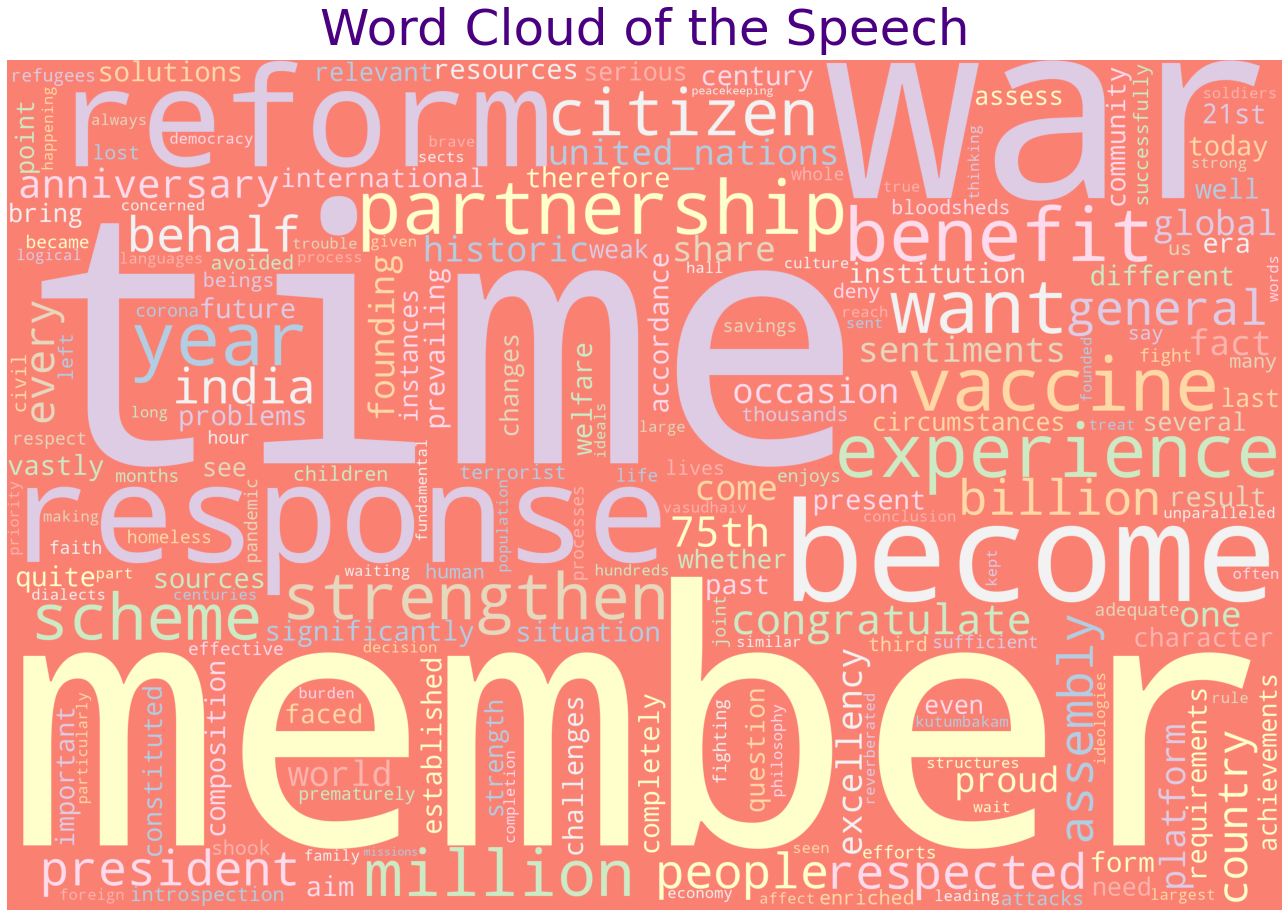

In [ ]:
from wordcloud import WordCloud, STOPWORDS

words = []
for i,row in df.iterrows():
  word = row['clean']
  for each in word :
    words.append(each)
words = nltk.FreqDist(words)
plot_wordcloud(words, max_words=400, max_font_size=120,title = 'Word Cloud of the Speech', title_size=50)
plt.savefig('plot_wordcloud', dpi = 300, bbox_inches = 'tight')



In [ ]:
text_data = list(df['clean'])

In [ ]:
from gensim import corpora #importing gensim for extracting topics
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(text_data)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in text_data]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.053*"india" + 0.026*"today" + 0.019*"million" + 0.019*"years" + 0.014*"free" + 0.014*"easy" + 0.014*"women" + 0.011*"people" + 0.010*"citizens" + 0.010*"access"'), (1, '0.045*"excellency" + 0.034*"also" + 0.032*"world" + 0.029*"country" + 0.019*"pandemic" + 0.019*"global" + 0.015*"largest" + 0.011*"one" + 0.011*"united_nations" + 0.011*"many"'), (2, '0.057*"india" + 0.013*"always" + 0.013*"whole" + 0.011*"country" + 0.010*"countries" + 0.010*"world" + 0.010*"welfare" + 0.009*"one" + 0.008*"towards" + 0.008*"international"'), (3, '0.051*"united_nations" + 0.044*"world" + 0.040*"india" + 0.017*"welfare" + 0.016*"75th" + 0.016*"anniversary" + 0.016*"occasion" + 0.014*"today" + 0.013*"people" + 0.011*"institution"')]


In [ ]:
import gensim # Print the Keyword in the 10 topics
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word=dictionary, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.034*"today" + 0.034*"different" + 0.017*"world" + 0.017*"situation" + 0.017*"1945" + 0.017*"institution" + 0.017*"century" + 0.017*"prevailing" + 0.017*"changes" + 0.017*"global"')
(1, '0.002*"india" + 0.002*"world" + 0.002*"countries" + 0.002*"welfare" + 0.002*"wars" + 0.002*"also" + 0.002*"human" + 0.002*"pandemic" + 0.002*"always" + 0.002*"several"')
(2, '0.071*"india" + 0.020*"country" + 0.020*"united_nations" + 0.016*"one" + 0.016*"whole" + 0.016*"world" + 0.012*"philosophy" + 0.012*"international" + 0.012*"always" + 0.012*"today"')
(3, '0.002*"excellency" + 0.002*"world" + 0.002*"respected" + 0.002*"india" + 0.002*"chairman" + 0.002*"country" + 0.002*"united_nations" + 0.002*"cultural" + 0.002*"bestowed" + 0.002*"council"')
(4, '0.066*"world" + 0.038*"united_nations" + 0.020*"country" + 0.020*"strong" + 0.020*"welfare" + 0.020*"anniversary" + 0.020*"75th" + 0.020*"occasion" + 0.010*"india" + 0.010*"long"')
(5, '0.178*"excellency" + 0.002*"india" + 0.002*"also" + 0.002*"tod

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9801,"united_nations, world, india, welfare, 75th, anniversary, occasion, today, people, institution","[respected, president, general, assembly, behalf, 1, 3, billion, people, india, would, like, con..."
1,1,1.0,0.6250,"excellency, also, world, country, pandemic, global, largest, one, united_nations, many",[excellency]
2,2,3.0,0.9895,"united_nations, world, india, welfare, 75th, anniversary, occasion, today, people, institution","[world, 1945, significantly, different, today, world, global, situation, sources, resources, pro..."
3,3,1.0,0.9903,"excellency, also, world, country, pandemic, global, largest, one, united_nations, many","[time, also, several, instances, point, serious, need, introspection, united_nations, one, could..."
4,4,1.0,0.6250,"excellency, also, world, country, pandemic, global, largest, one, united_nations, many",[excellency]
5,5,3.0,0.9784,"united_nations, world, india, welfare, 75th, anniversary, occasion, today, people, institution","[reform, responses, processes, character, united_nations, need, hour, fact, faith, respect, unit..."
6,6,1.0,0.9788,"excellency, also, world, country, pandemic, global, largest, one, united_nations, many","[long, india, kept, decision, making, structures, united_nations, country, largest, democracy, w..."
7,7,1.0,0.6250,"excellency, also, world, country, pandemic, global, largest, one, united_nations, many",[excellency]
8,8,3.0,0.9055,"united_nations, world, india, welfare, 75th, anniversary, occasion, today, people, institution","[strong, trouble, world, weak, become, burden, world]"
9,9,1.0,0.6250,"excellency, also, world, country, pandemic, global, largest, one, united_nations, many",[excellency]


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9933,"india, today, million, years, free, easy, women, people, citizens, access","[past, years, following, mantra, reform, perform, transform, india, made, great, efforts, bring,..."
1,1.0,0.9903,"excellency, also, world, country, pandemic, global, largest, one, united_nations, many","[time, also, several, instances, point, serious, need, introspection, united_nations, one, could..."
2,2.0,0.9915,"india, always, whole, country, countries, world, welfare, one, towards, international","[india, initiated, international, day, non, violence, 02, october, international, day, yoga, 21,..."
3,3.0,0.9895,"united_nations, world, india, welfare, 75th, anniversary, occasion, today, people, institution","[world, 1945, significantly, different, today, world, global, situation, sources, resources, pro..."


In [ ]:
pip install pyLDAvis #using plydavis to interpret topics

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 32.0 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=b647650fe98a4461f233c4d1468322c14b928f7c0085eb342146967667d8088a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompat

In [ ]:
import pyLDAvis.gensim_models
lda10 = gensim.models.ldamodel.LdaModel.load('model10.gensim')
lda_display10 = pyLDAvis.gensim_models.prepare(lda10, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display10)



/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning:

This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information

/usr/local/lib/python3.7/dist-packag

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.test.utils import common_corpus

In [ ]:
coherence_model_lda = CoherenceModel(model=lda10, texts=text_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.6529423862378011


In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    ss = TextBlob(text).sentiment.polarity
    return ss

def analyze_subjectivity(text):
    ss = TextBlob(text).sentiment.subjectivity
    return ss

In [ ]:
df['polarity'] = np.array([ analyze_sentiment(text) for text in df['text'] ])
df['subjectivity'] = np.array([ analyze_subjectivity(text) for text in df['text'] ])
df.head()

,text,token,clean,stems,polarity,subjectivity
0,respected president of the general assembly on behalf of over 1 3 billion people of india i woul...,"[respected, president, of, the, general, assembly, on, behalf, of, over, 1, 3, billion, people, ...","[respected, president, general, assembly, behalf, 1, 3, billion, people, india, would, like, con...","[respect, president, general, assembly, behalf, 1, 3, billion, people, india, would, like, congr...",0.212500,0.375000
1,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000
2,the world of 1945 was significantly different from today s world the global situation sources re...,"[the, world, of, 1945, was, significantly, different, from, today, s, world, the, global, situat...","[world, 1945, significantly, different, today, world, global, situation, sources, resources, pro...","[world, 1945, significantly, different, today, world, global, situation, source, resource, probl...",0.018438,0.335417
3,but at the same time there are also several instances that point to a serious need for introspec...,"[but, at, the, same, time, there, are, also, several, instances, that, point, to, a, serious, ne...","[time, also, several, instances, point, serious, need, introspection, united_nations, one, could...","[time, also, several, instance, point, serious, need, introspection, united_nations, one, could,...",0.159375,0.277604
4,your excellency,"[your, excellency]",[excellency],[excellency],0.000000,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98caee6890>]],
      dtype=object)

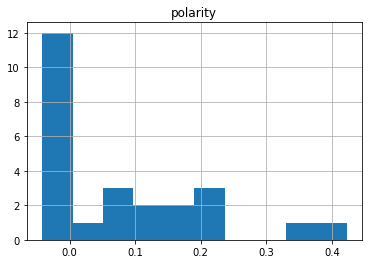

In [ ]:
df.hist(column='polarity')

In [ ]:
df["polarity"].mean()

0.08417281746031746

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98bd820310>]],
      dtype=object)

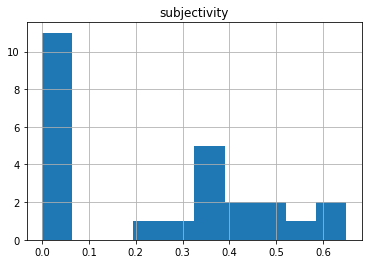

In [ ]:
df.hist(column='subjectivity')

In [ ]:
df["subjectivity"].mean()

0.23999226190476194

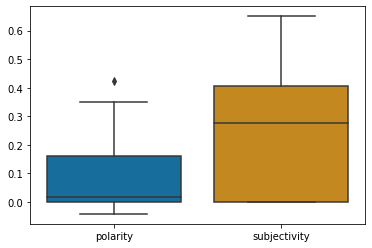

In [ ]:
import seaborn as sns
sns.boxplot(data = df,palette="colorblind")